In [88]:
using Plots

In [89]:
function golden_section(f, a, b, eps=0.01)
    Fi = (1+5^0.5)/2
    while true
        x1 = b-(b-a)/Fi 
        x2 = a+(b-a)/Fi 
        y1 = f(x1)
        y2 = f(x2)
        if y1 >= y2
            a = x1
        else
            b = x2
        end
        if abs(b-a) < eps
            return (a+b)/2
        end
    end
end
function norm(a)
    su = 0 
    for i ∈ a
        su += i^2
    end
    return su^(1/2)
end
function dfdx(f, x,y, h)
    return (f(x+h,y)-f(x-h,y))/(2*h)
end
function dfdy(f, x,y, h)
    return (f(x,y+h)-f(x,y-h))/(2*h)
end
function calc_grad(f, x, h)
    grad = similar(x)
    for i in eachindex(x)
        x_forward = copy(x)
        x_backward = copy(x)

        x_forward[i] += h
        x_backward[i] -= h

        grad[i] = (f(x_forward...) - f(x_backward...)) / (2*h)
    end
    return grad
end
function grad_d(f,start,alpha, eps, h)
    x_i = copy(start)
    hist = [copy(start)]
    while true
        grad = calc_grad(f, x_i, h)
        x_i1 = x_i-alpha*grad
        x_i = x_i1
        push!(hist, copy(x_i))
        if norm(calc_grad(f, x_i, h)) < eps
            return x_i, hist
        end
    end
end

grad_d (generic function with 1 method)

In [90]:
function KL(f, start, m, eps, h)
    x = copy(start)
    hist = []
    pred_x = x
    first = true
    dxs = []
    while true
        push!(hist, copy(x))
        grad = [dfdx(f, x..., h), dfdy(f, x..., h)]
        if norm(grad) < eps
            return x, hist
        end
        if first
            a = golden_section(a -> f((x-a*grad)...), 0, 1)
            pred_x = copy(x)
            x = x-a*grad
            first = false
        else
            dx = (x-pred_x)
            push!(dxs, dx)
            n = min(m, length(dxs))
            a, _ = grad_d((a1, as...) -> f((x-a1*grad+sum([as[i]*dxs[length(dxs)-i+1] for i ∈ 1:n]))...), [0.1 for _ ∈ 0:n], 0.0001, 0.1, 0.01)
            pred_x = copy(x)
            x = x - a[1]*grad+sum([a[i+1]*dxs[length(dxs)-i+1] for i ∈ 1:n])
        end
    end
end

KL (generic function with 1 method)

In [91]:
banan(x, y) = 1*(x^2-y)^2+1*(x-1)^2+0
rastrigin(x, y) = 10 * 2 + x^2 - 10 * cos(2π * x) + y^2 - 10 * cos(2π * y)

schwefel(x, y) = 418.9829 * 2 - (x * sin(sqrt(abs(x))) + y * sin(sqrt(abs(y))))

xs1 = -10:1:10
ys1 = -10:1:10
xs2 = 410:1:430
ys2 = 410:1:430

410:1:430

473
[1.0009033459022267, 1.0020377802956288]


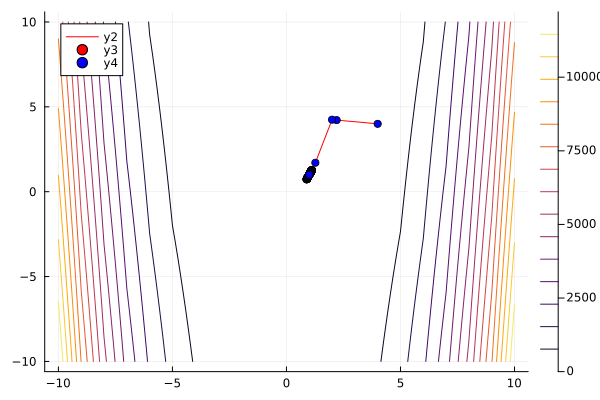

TypeError: TypeError: in typeassert, expected REPL.REPLCompletions.MethodCompletion, got a value of type REPL.REPLCompletions.TextCompletion

TypeError: TypeError: in typeassert, expected REPL.REPLCompletions.MethodCompletion, got a value of type REPL.REPLCompletions.TextCompletion

TypeError: TypeError: in typeassert, expected REPL.REPLCompletions.MethodCompletion, got a value of type REPL.REPLCompletions.TextCompletion

TypeError: TypeError: in typeassert, expected REPL.REPLCompletions.MethodCompletion, got a value of type REPL.REPLCompletions.TextCompletion

In [130]:
x_min, hist = KL(banan, [4., 4.], 11, 0.001, 0.00000001)
println(length(hist))
println(x_min)
contour(xs1, ys1, banan)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:red)
scatter!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:blue)

3
[4.93205117635398e-6, 4.614382234535697e-6]


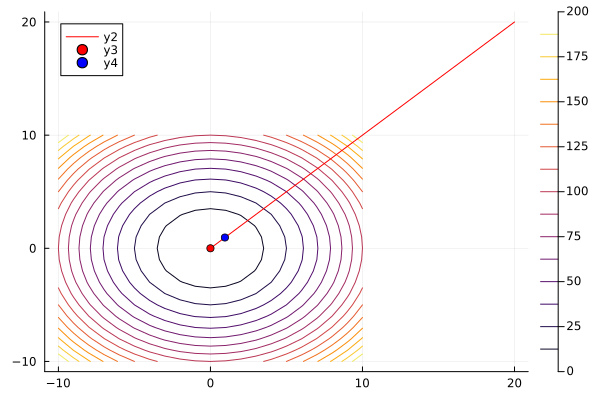

In [98]:
x_min, hist = KL(rastrigin, [20., 20.], 3, 0.01, 0.00000001)
println(length(hist))
println(x_min)
contour(xs1, ys1, rastrigin)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:red)
scatter!([hist[2][1]], [hist[2][2]], color=:blue)

3
[421.00238042871047, 421.00238042871047]


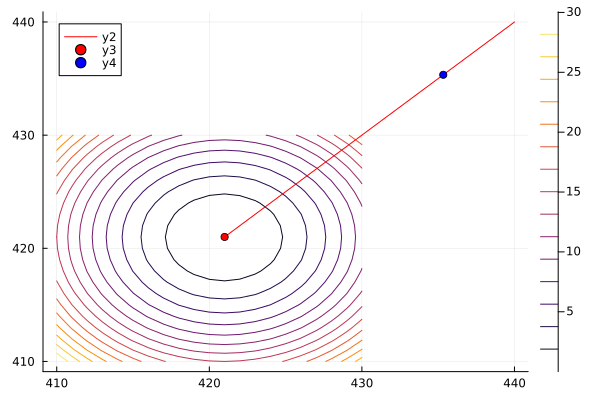

In [95]:
x_min, hist = KL(schwefel, [440., 440.], 3, 0.1, 0.00000001)
println(length(hist))
println(x_min)
contour(xs2, ys2, schwefel)
plot!([h[1] for h ∈ hist], [h[2] for h ∈ hist], color=:red)
scatter!([x_min[1]], [x_min[2]], color=:red)
scatter!([hist[2][1]], [hist[2][2]], color=:blue)

In [ ]:
tis = []
iters = []
prs = []
for i ∈ 1:11
    ti = time()
    x_min, hist = KL(banan, [4., 4.], i, 0.001, 0.00000001)
    push!(tis, time()-ti)
    push!(iters, length(hist))
    push!(prs, i)
end



LoadError: UndefVarError: `psr` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [145]:
plot(prs, [tis], label="time", title="KL time (Rosenbrock)", linewidth=3)
xlabel!("m")
ylabel!("time, sec")
savefig("time.png")

"/home/andrey/work/Optimization/lab9/time.png"

In [146]:
plot(prs, [iters], label="iter num", title="KL iter num (Rosenbrock)", linewidth=3)
xlabel!("m")
ylabel!("iter num")
savefig("iter.png")

"/home/andrey/work/Optimization/lab9/iter.png"